In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings

warnings.simplefilter("ignore")

<div class="alert alert-block alert-info">
  <b>Info : </b>Dataset ini adalah dataset berisikan data polutan udara di setiap
  waktu yang diambil dari 12 lokasi pemantauan kualitas udara yang dikontrol
  secara nasional pada wilayah beijing. Periode: <i>March 1st, 2013 to February 28th, 2017. </i>
</div>


# **INTRO**

<span style="color:#fff; font-family: 'arial'; font-size: 18px;">Berikut merupakan tahapan - tahapan yang dilakukan dari awal hingga akhir dengan tujuan untuk mencari insight, menjawab pertanyaan, dan memberikan visualisasi dari dataset yang digunakan dengan menerapkan langkah - langkah yang sudah diberikan pada latihan sebelumnya : </span>
1. [**Gathering Data**](#1-gathering-data)
2. [**Assessing Data**](#2-assesing-data)
3. [**Cleaning Data**](#3-cleaning-data)
4. [**EDA**](#4-eda)


## **1. Gathering Data**

In [156]:
# gabungkan seluruh file csv dari tiap" lokasi ke dalam 1 file dan simpan sbg file baru
files = os.path.join("./data/", "PRSA*.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.to_csv("./data/CombinedDatasetPRSA.csv", index=False)

In [157]:
df = pd.read_csv("./data/CombinedDatasetPRSA.csv")
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


## **2. Assesing Data**

In [158]:
# mengubah seluruh kolom dengan huruf kecil untuk mempermudah penulisan
df.columns = df.columns.str.lower()

In [159]:
print(f"Rows : {df.shape[0]}, Columns : {df.shape[1]}")

Rows : 420768, Columns : 18


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   no       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   pm2.5    412029 non-null  float64
 6   pm10     414319 non-null  float64
 7   so2      411747 non-null  float64
 8   no2      408652 non-null  float64
 9   co       400067 non-null  float64
 10  o3       407491 non-null  float64
 11  temp     420370 non-null  float64
 12  pres     420375 non-null  float64
 13  dewp     420365 non-null  float64
 14  rain     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  wspm     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [161]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no,420768.0,NaN,NaN,NaN,17532.5,10122.116943,1.0,8766.75,17532.5,26298.25,35064.0
year,420768.0,NaN,NaN,NaN,2014.66256,1.177198,2013.0,2014.0,2015.0,2016.0,2017.0
month,420768.0,NaN,NaN,NaN,6.52293,3.448707,1.0,4.0,7.0,10.0,12.0
day,420768.0,NaN,NaN,NaN,15.729637,8.800102,1.0,8.0,16.0,23.0,31.0
hour,420768.0,NaN,NaN,NaN,11.5,6.922195,0.0,5.75,11.5,17.25,23.0
pm2.5,412029.0,NaN,NaN,NaN,79.793428,80.822391,2.0,20.0,55.0,111.0,999.0
pm10,414319.0,NaN,NaN,NaN,104.602618,91.772426,2.0,36.0,82.0,145.0,999.0
so2,411747.0,NaN,NaN,NaN,15.830835,21.650603,0.2856,3.0,7.0,20.0,500.0
no2,408652.0,NaN,NaN,NaN,50.638586,35.127912,1.0265,23.0,43.0,71.0,290.0
co,400067.0,NaN,NaN,NaN,1230.766454,1160.182716,100.0,500.0,900.0,1500.0,10000.0


In [162]:
df.isna().sum()

no             0
year           0
month          0
day            0
hour           0
pm2.5       8739
pm10        6449
so2         9021
no2        12116
co         20701
o3         13277
temp         398
pres         393
dewp         403
rain         390
wd          1822
wspm         318
station        0
dtype: int64

In [163]:
df.duplicated().sum()

0

In [164]:
df["year"].value_counts()

year
2016    105408
2014    105120
2015    105120
2013     88128
2017     16992
Name: count, dtype: int64

In [165]:
# jumlah data pada setiap stasiun sama banyaknya
df["station"].value_counts()

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64

In [166]:
df.sample(20)

,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
159084,18829,2015,4,24,12,40.0,149.0,7.0000,21.0000,500.0,116.0000,23.900,1016.9,-1.9,0.0,SW,2.8,Guanyuan
281011,500,2013,3,21,19,166.0,192.0,12.0000,110.0000,1600.0,16.0000,5.600,1005.0,-1.3,0.0,N,1.4,Shunyi
242098,31715,2016,10,12,10,67.0,77.0,17.0000,34.0000,1600.0,12.0000,13.400,1017.7,8.0,0.0,W,1.2,Huairou
415170,29467,2016,7,10,18,60.0,60.0,9.0000,18.0000,700.0,212.0000,34.900,995.8,19.7,0.0,SSW,2.9,Wanshouxigong
356833,6194,2013,11,14,1,216.0,224.0,14.0000,97.5175,4500.0,NaN,3.500,1013.4,0.5,0.0,NE,1.1,Wanliu
186128,10809,2014,5,25,8,149.0,149.0,2.0000,50.0000,1000.0,12.0000,24.300,999.8,1.2,0.0,W,3.0,Gucheng
155107,14852,2014,11,9,19,60.0,98.0,5.0000,97.0000,900.0,14.0000,5.200,1024.0,1.3,0.0,WSW,0.9,Guanyuan
332575,17000,2015,2,7,7,11.0,18.0,12.0000,24.0000,300.0,71.0000,2.000,1024.0,-17.0,0.0,NNW,3.4,Tiantan
342315,26740,2016,3,19,3,181.0,181.0,38.0000,51.0000,2200.0,51.0000,8.300,1015.9,-1.0,0.0,ENE,0.4,Tiantan
244281,33898,2017,1,11,9,21.0,36.0,6.0000,38.0000,900.0,3.0000,-9.525,1017.5,-14.7,0.0,SW,1.0,Huairou


## **3. Cleaning Data**

In [167]:
# penulis menggunakan teknik interpolasi dikarenakan bentuk data yang berupa time series, jadi penulis memiliki asumsi dimana nilai antara data pada rows sebelumnya dan sesudahnya tidak berbeda jauh antara satu sama lain sehingga data sebelum dan sesudahnya dapat dijadikan acuan untuk mengisi nilai data yang hilang
df.interpolate(method="linear", inplace=True)
df.isna().sum()

no            0
year          0
month         0
day           0
hour          0
pm2.5         0
pm10          0
so2           0
no2           0
co            0
o3            0
temp          0
pres          0
dewp          0
rain          0
wd         1822
wspm          0
station       0
dtype: int64

In [168]:
# penulis juga menghilangkan beberapa metrik yang ada dengan alasan bahwa metrik" tsb tidak begitu memiliki pengaruh dalam menentukan tingkat kualitas udara. Sumber : https://byjus.com/free-ias-prep/pollution-measurement/#:~:text=The%20most%20common%20measurement%20used,than%2010%20microns%20in%20diameter.
df.drop(
    ["wd", "wspm", "rain", "dewp", "pres", "temp"],
    inplace=True,
    errors="ignore",
    axis=1,
)

In [169]:
# tampilan dari beberapa sampel data yang sudah dibersihkan
df.sample(10)

,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,station
39747,4684,2013,9,12,3,84.0,90.0,1.0,16.0,800.0,63.0000,Changping
411330,25627,2016,2,1,18,8.0,12.0,5.0,20.0,300.0,68.0000,Wanshouxigong
309681,29170,2016,6,28,9,24.0,24.0,2.0,20.0,400.0,98.0000,Shunyi
41028,5965,2013,11,4,12,40.0,62.0,29.0,54.0,700.0,29.1312,Changping
143204,2949,2013,7,1,20,135.0,248.0,10.0,47.0,2799.0,2.0000,Guanyuan
380798,30159,2016,8,8,14,15.0,15.0,2.0,13.0,400.0,148.0000,Wanliu
91876,21749,2015,8,24,4,7.0,13.0,4.0,6.0,400.0,27.0000,Dingling
412104,26401,2016,3,5,0,163.0,647.0,11.0,13.0,500.0,60.0000,Wanshouxigong
249413,3966,2013,8,13,5,78.0,32.0,11.0,24.0,1100.0,44.0000,Nongzhanguan
185528,10209,2014,4,30,8,126.0,243.0,11.0,128.0,1600.0,5.0000,Gucheng


In [170]:
try:
    df["datetime"] = pd.to_datetime(df[["day", "month", "year", "hour"]])
except:
    pass
df.drop(["month", "year", "day", "hour"], axis=1, errors="ignore", inplace=True)
df.rename(columns={"no": "id"}, inplace=True)
df.tail()

,id,pm2.5,pm10,so2,no2,co,o3,station,datetime
420763,35060,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong,2017-02-28 19:00:00
420764,35061,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong,2017-02-28 20:00:00
420765,35062,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong,2017-02-28 21:00:00
420766,35063,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong,2017-02-28 22:00:00
420767,35064,13.0,19.0,4.0,38.0,600.0,49.0,Wanshouxigong,2017-02-28 23:00:00


In [171]:
df.duplicated().sum()

0

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        420768 non-null  int64         
 1   pm2.5     420768 non-null  float64       
 2   pm10      420768 non-null  float64       
 3   so2       420768 non-null  float64       
 4   no2       420768 non-null  float64       
 5   co        420768 non-null  float64       
 6   o3        420768 non-null  float64       
 7   station   420768 non-null  object        
 8   datetime  420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 28.9+ MB


## **4. EDA**

<span style="color:#fff; font-family: 'arial'; font-size: 18px;">Pada analisis data ini, penulis menggunakan **PM2.5** sebagai parameter utama untuk menentukan indeks kualitas udara, ini dikarenakan pada sumber terkait dikatakan bahwa ["PM2.5 merupakan parameter pencemar udara paling berpengaruh terhadap kesehatan manusia"](https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia).</span>


#### ***Mendefinisikan Pertanyaan Analitis :***
***
- Bagaimana korelasi antara parameter yang ada pada dataset ?
- Berdasarkan pada standar acuan yang ada, berapa jumlah masing - masing data pada kategori standarisasi indeks kualitas udara ?
- Stasiun manakah yang memiliki kualitas udara terbaik dan stasiun manakah yang memiliki kualitas udara terburuk ?
- Bagaimana perkembangan indeks kualitas udara pada seluruh stasiun dari periode awal pengambilan dataset hingga akhir ?

- Menampilkan korelasi antara pm2.5 dg pm10, serta korelasi antara parameter lainnya

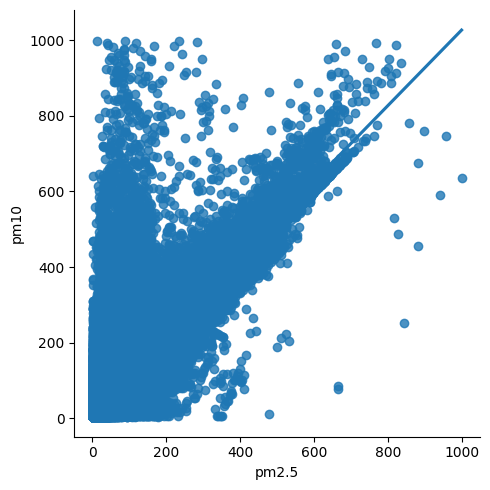

In [173]:
# melihat korelasi antara metrik" yang menentukan indeks kualitas udara (terutama pm2.5 dgn pm10)
df_corr = df.drop(
    ["station", "year", "month", "no", "day", "hour", "category"],
    axis=1,
    errors="ignore",
)
df_corr.corr(numeric_only=True)
# sns.heatmap(data=df_corr, annot=True, annot_kws={"size": 10})
# plt.show()
sns.lmplot(x="pm2.5", y="pm10", data=df_corr)
plt.show()

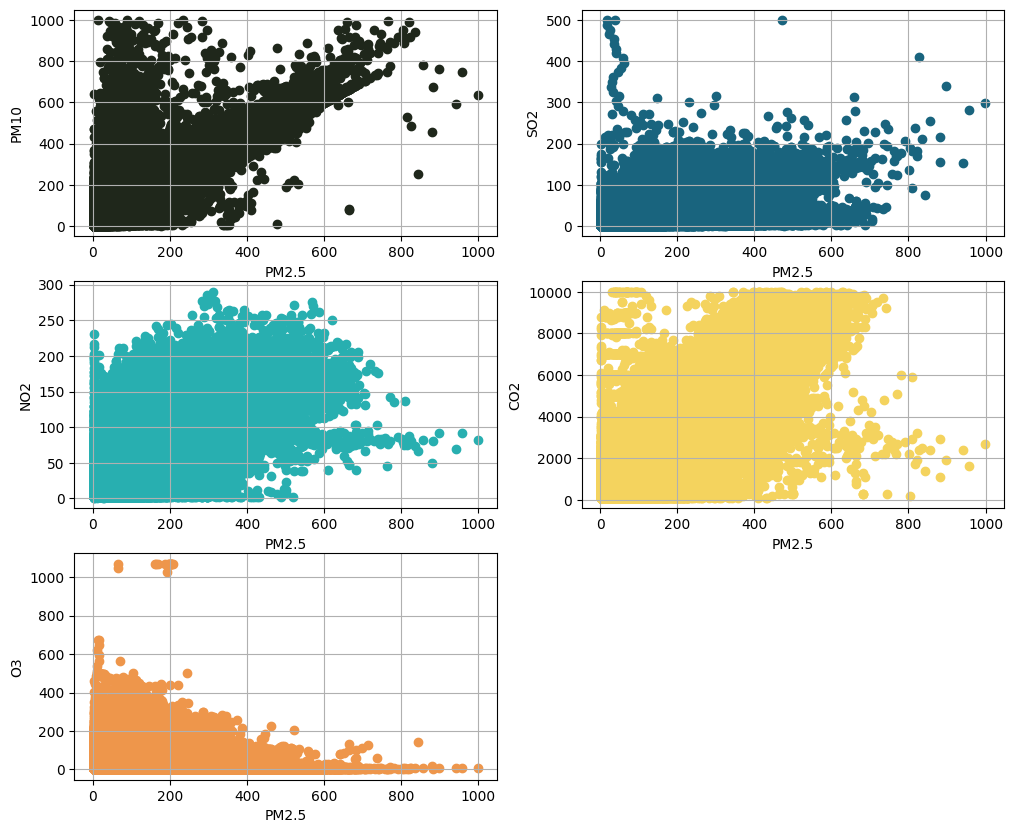

In [174]:
plt.rcParams["figure.figsize"] = (12, 10)
plt.subplot(3, 2, 1)
x1 = df_corr["pm2.5"]
y1 = df_corr["pm10"]
plt.scatter(x1, y1, c="#1F271B")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.grid()

plt.subplot(3, 2, 2)
x2 = df_corr["pm2.5"]
y2 = df_corr["so2"]
plt.scatter(x2, y2, c="#19647E")
plt.xlabel("PM2.5")
plt.ylabel("SO2")
plt.grid()

plt.subplot(3, 2, 3)
x3 = df_corr["pm2.5"]
y3 = df_corr["no2"]
plt.scatter(x3, y3, c="#28AFB0")
plt.xlabel("PM2.5")
plt.ylabel("NO2")
plt.grid()

plt.subplot(3, 2, 4)
x4 = df_corr["pm2.5"]
y4 = df_corr["co"]
plt.scatter(x4, y4, c="#F4D35E")
plt.xlabel("PM2.5")
plt.ylabel("CO2")
plt.grid()

plt.subplot(3, 2, 5)
x5 = df_corr["pm2.5"]
y5 = df_corr["o3"]
plt.scatter(x5, y5, c="#EE964B")
plt.xlabel("PM2.5")
plt.ylabel("O3")
plt.grid()

In [175]:
df_corr.corr()

,id,pm2.5,pm10,so2,no2,co,o3,datetime
id,1.000000,-0.024719,-0.047232,-0.227029,-0.047090,0.019026,-0.040679,1.000000
pm2.5,-0.024719,1.000000,0.878874,0.478223,0.664306,0.780165,-0.149508,-0.024719
pm10,-0.047232,0.878874,1.000000,0.460572,0.645583,0.691887,-0.110443,-0.047232
so2,-0.227029,0.478223,0.460572,1.000000,0.495826,0.522678,-0.165311,-0.227029
no2,-0.047090,0.664306,0.645583,0.495826,1.000000,0.694036,-0.465912,-0.047090
co,0.019026,0.780165,0.691887,0.522678,0.694036,1.000000,-0.306979,0.019026
o3,-0.040679,-0.149508,-0.110443,-0.165311,-0.465912,-0.306979,1.000000,-0.040679
datetime,1.000000,-0.024719,-0.047232,-0.227029,-0.047090,0.019026,-0.040679,1.000000


- Menampilkan jumlah data berdasarkan berdasarkan masing" standar kategori yang ada

In [176]:
def condition(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    else:
        return "Severe"


df["category"] = df["pm2.5"].apply(condition)
df["category"] = df["category"].astype("category")
df["category"].value_counts()

category
Good            198916
Satisfactory    102099
Moderate         84647
Poor             25026
Very Poor         7087
Severe            2993
Name: count, dtype: int64

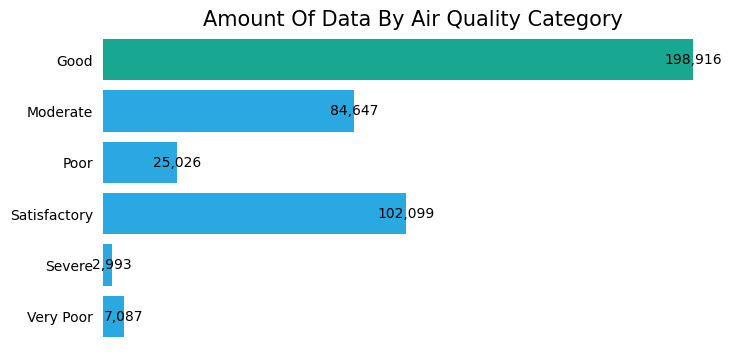

In [177]:
df_air_category = (
    df.groupby("category")["id"].count().sort_values(ascending=False).reset_index()
)

fig, ax = plt.subplots(figsize=(8, 4))
colors = ["#00bfa0", "#0bb4ff", "#0bb4ff", "#0bb4ff", "#0bb4ff", "#0bb4ff"]

sns.barplot(
    x="id",
    y="category",
    data=df_air_category.sort_values("category", ascending=False),
    ax=ax,
    palette=colors,
)
sns.despine(bottom=True, left=True)
ax.set(xticklabels=[])
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_ticks_position("none")
plt.title("Amount Of Data By Air Quality Category", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=12)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width()):,}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
    )

plt.show()

- Menampilkan perkembangan indeks kualitas udara pada seluruh stasiun dari periode awal pengambilan dataset hingga akhir

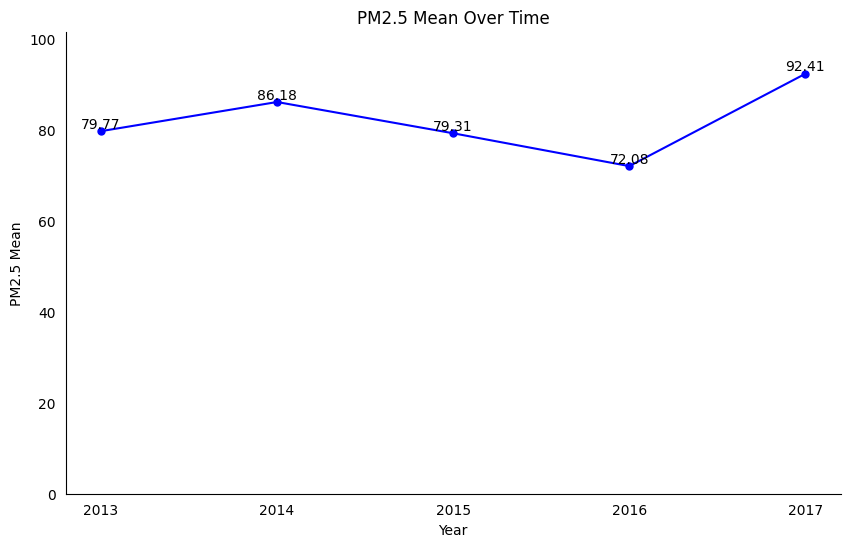

In [178]:
df_byyear = (
    df.resample(rule="Y", on="datetime")
    .agg({"pm2.5": ["min", "max", "mean"], "pm10": ["min", "max", "mean"]})
    .sort_values(by="datetime", ascending=True)
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10, 6))

df_byyear["datetime"] = df_byyear["datetime"].dt.strftime("%Y")
years = df_byyear["datetime"]
pm2_5_mean = df_byyear["pm2.5"]["mean"]

ax.plot(
    df_byyear["datetime"],
    df_byyear["pm2.5"]["mean"],
    color="b",
    linestyle="-",
    marker="o",
    markersize=5,
    label="PM2.5 Mean",
)


# menampilkan nilai pada titik data di setiap tahunnya
for i in range(len(years)):
    ax.text(years[i], pm2_5_mean[i], f"{pm2_5_mean[i]:.2f}", ha="center", va="bottom")


ax.set_ylim(0, max(df_byyear["pm2.5"]["mean"]) * 1.1)
ax.set_xlabel("Year")
ax.set_ylabel("PM2.5 Mean")
ax.set_title("PM2.5 Mean Over Time")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(
    axis="both", which="both", bottom=False, top=False, left=False, right=False
)

plt.show()

- Menampilkan visualisasi dari 3 stasiun dengan rata" indeks kualitas udara terbaik dan terburuk

In [179]:
df_air_bystation = (
    df.groupby("station")["pm2.5"].mean().sort_values(ascending=False).reset_index()
)
df_air_bystation

,station,pm2.5
0,Dongsi,86.144243
1,Nongzhanguan,85.079472
2,Wanshouxigong,85.067548
3,Gucheng,84.074802
4,Wanliu,83.467612
5,Guanyuan,82.897522
6,Aotizhongxin,82.540623
7,Tiantan,82.033097
8,Shunyi,79.437962
9,Changping,70.986438


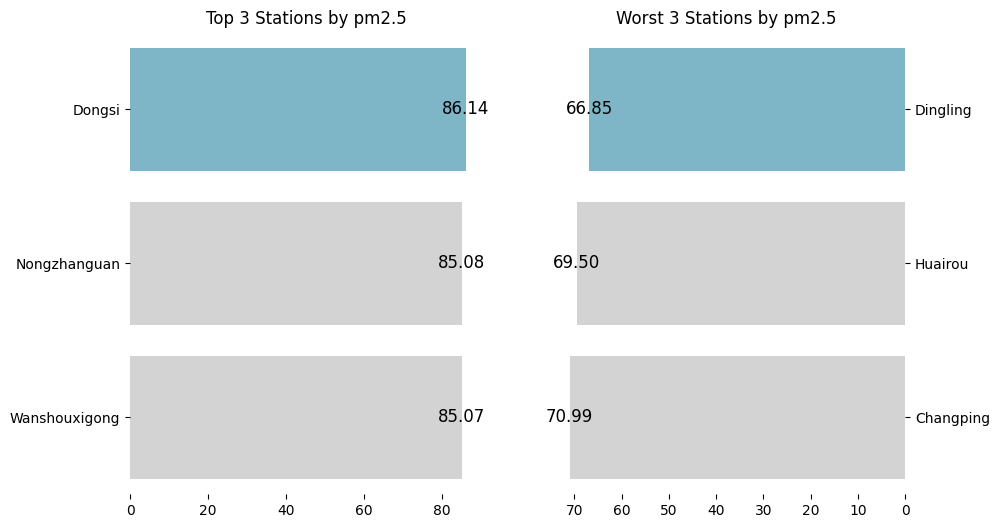

In [180]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.barplot(
    x="pm2.5",
    y="station",
    data=df_air_bystation.sort_values(by="pm2.5", ascending=False).head(3),
    palette=colors,
    linewidth=0,
    ax=ax[0],
)

sns.despine(left=True, bottom=True)

for p in ax[0].patches:
    ax[0].annotate(
        f"{p.get_width():.2f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    )
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Top 3 Stations by pm2.5", loc="center")


sns.barplot(
    x="pm2.5",
    y="station",
    data=df_air_bystation.sort_values(by="pm2.5", ascending=True).head(3),
    palette=colors,
    linewidth=0,
    ax=ax[1],
)
for p in ax[1].patches:
    ax[1].annotate(
        f"{p.get_width():.2f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst 3 Stations by pm2.5 ", loc="center")

plt.show()

In [181]:
df.to_csv("./dashboard/fixed_dataset.csv", index=False)

## **Kesimpulan**
1. Korelasi antara parameter dataset, terutama pm2.5 dengan pm10 menunjukkan korelasi linear positif pada sebagaian besar datanya, begitu juga korelasi antara pm.25 dengan parameter yang lainnya. Pm2.5 dijadikan acuan karena parameter tersebutlah yang dikatakan paling berpengaruh terhadap kesehatan manusia.
2. Apabila dilihat dari standar acuan indeks kualitas udara, berdasarkan golongannya data - data tersebut mayoritasnya berkategori 'Good' atau bagus apabila dilihat dari rentang nilai pm2.5nya
3. Berdasarkan rentang periode dari awal hingga akhir, maka diketahui stasiun yang memiliki kualitas udara terbaik berdasarkan dari rata - rata pm2.5nya adalah stasiun 'Dongsi' dan stasiun yang  memiliki kualitas udara terburuk yaitu 'Dingling'.
4. Perkembangan indeks kualitas udara mengalami lonjakan pada tahun 2014, dimana sebelumnya hanya bernilai rata - rata 79,77 pada tahun 2013, dan naik menjadi 86,14 pada tahun 2014, kemudian mengalami penurunan dari tahun 2014 hingga 2016, dan mengalami kenaikan hingga menyentuh angka 92,41 pada tahun 2017.